In [220]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import cv2
import keras 
import math
from keras.utils import np_utils

In [221]:
ds=pd.read_csv('./data/mnist_data/train.csv')
data=np.array(ds)

In [265]:
x=data[:10000,1:]
y=data[:10000,0]
x=x/255.0

In [260]:
def softmax(layer):
    layer=layer-np.max(layer)
    layer=np.exp(layer)
    tot=float(np.sum(layer))+0.00001
    layer=layer/tot
    return layer

In [224]:
def loss_sample(sample,W,label):
    output=W.dot(sample)
    output=softmax(output)
    loss=-math.log(output[label]+0.000000001)
    return loss 

In [225]:
def total_loss(data,W,labels):
    net_loss=0.0
    for ic in range(data.shape[0]):
        net_loss+=loss_sample(data[ic],W,labels[ic])
    return net_loss/data.shape[0]    

In [226]:
def compute_grad(data,W,labels):
    dw=np.zeros_like(W)
    for i in range(data.shape[0]):
        temp=np.reshape(1-softmax(W.dot(data[i])),(10,1))
        dw+=temp.dot(np.reshape(data[i],(1,784)))
    dw=-dw/float(data.shape[0])    
    return dw


In [251]:
def optimization(data,W,labels):
    for i in range(int(data.shape[0]/128)):
        np.random.shuffle(data)
        batch=data[:128]
        grad_vec=compute_grad(batch,W,labels)
        W-=0.01*grad_vec
    return W

In [261]:
W=np.random.randn(10,784)

In [266]:
hist=[]
for epoch in range(1000):
    hist.append(total_loss(x,W,y))
    W=optimization(x,W,y)

KeyboardInterrupt: 

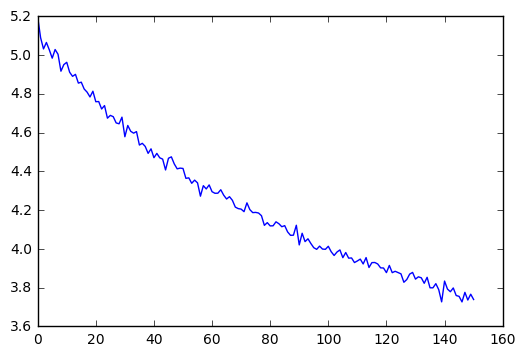

In [267]:
plt.plot(hist)

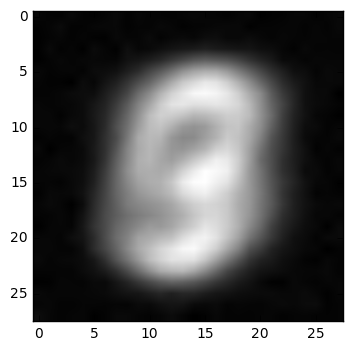

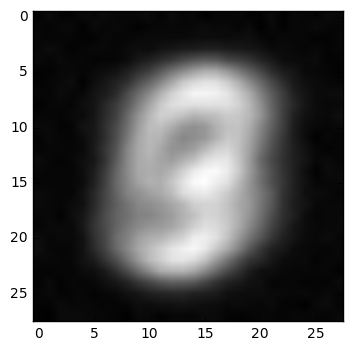

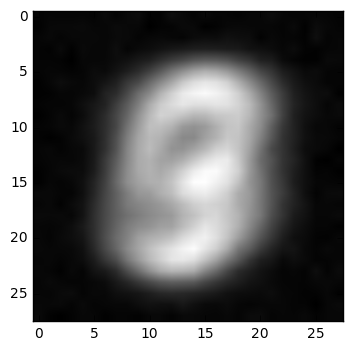

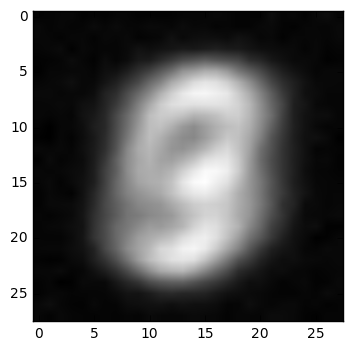

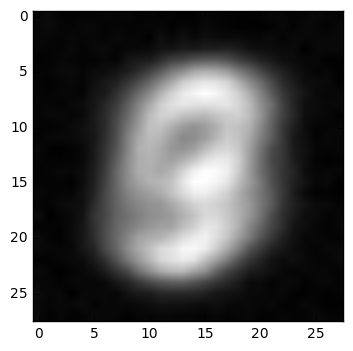

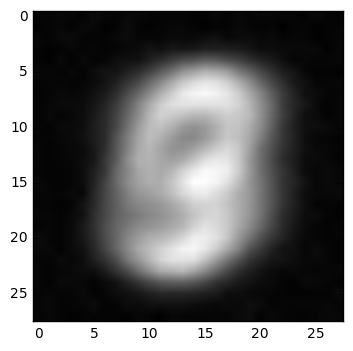

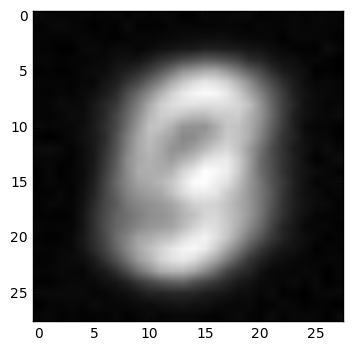

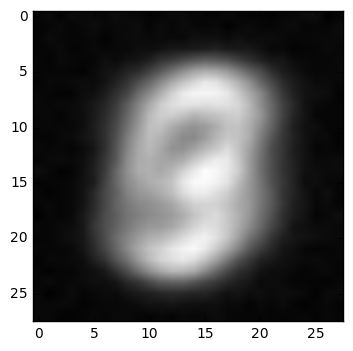

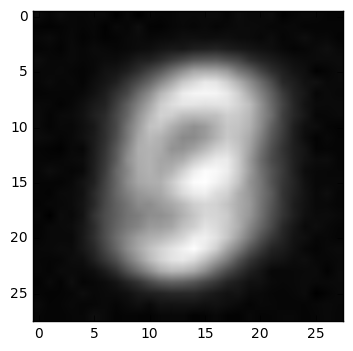

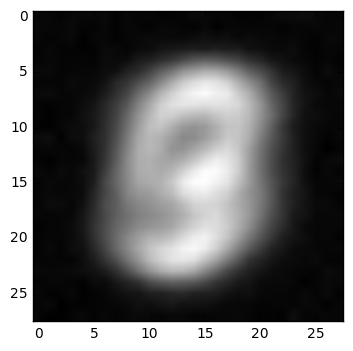

In [268]:
for i in range(10):
    a=W[i]
    a=np.reshape(a,(28,28))
    plt.imshow(a,cmap='gray')
    plt.show()